In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('WHR-2024-5CS037.csv')

<h1>Data Overview</h1>

In [5]:
df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [6]:
df.shape

(143, 9)

In [7]:
df.dtypes

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

<h1>Basic Statistics</h1>

In [9]:
df['score'].describe()

count    143.000000
mean       5.527580
std        1.170717
min        1.721000
25%        4.726000
50%        5.785000
75%        6.416000
max        7.741000
Name: score, dtype: float64

In [10]:
df['score'].max()

7.741

In [11]:
df['score'].min()

1.721

In [12]:
unhappy_country = df[df['score'] == 1.721]
happy_country = df[df['score'] == 7.741]

In [13]:
unhappy_country

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672


In [14]:
happy_country

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


<h1>Missing Values</h1>

In [16]:
df.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [17]:
df = df.dropna()

<h1>Filtering & Sorting</h1>

In [19]:
greater_score = df[df['score'] >7.5]

In [20]:
pd.DataFrame(greater_score)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [21]:
greater_score.sort_values(by=['Log GDP per capita'],ascending=False)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


<h1>Adding New Column</h1>

In [23]:
def happy_column(row):
    score = row['score']
    if(score<4):
        Happiness_category = 'Low'
    elif(score>4 and score<6):
        Happiness_category = 'Medium'
    else:
        Happiness_category = 'High'

    return Happiness_category

df['Happiness_category'] = df.apply(lambda row: happy_column(row), axis=1)

In [24]:
df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


<h1>2. Data Visualization</h1>

In [26]:
grped_c_happy = (df.groupby('Country name')['score'].mean().reset_index()).sort_values(by='score',ascending=False).head(10)

grped_c_happy

,Country name,score
39,Finland,7.741
31,Denmark,7.583
52,Iceland,7.525
120,Sweden,7.344
58,Israel,7.341
93,Netherlands,7.319
99,Norway,7.302
76,Luxembourg,7.122
121,Switzerland,7.060
5,Australia,7.057


Text(0.5, 1.0, 'The top 10 happiest countries by Score using a bar chart')

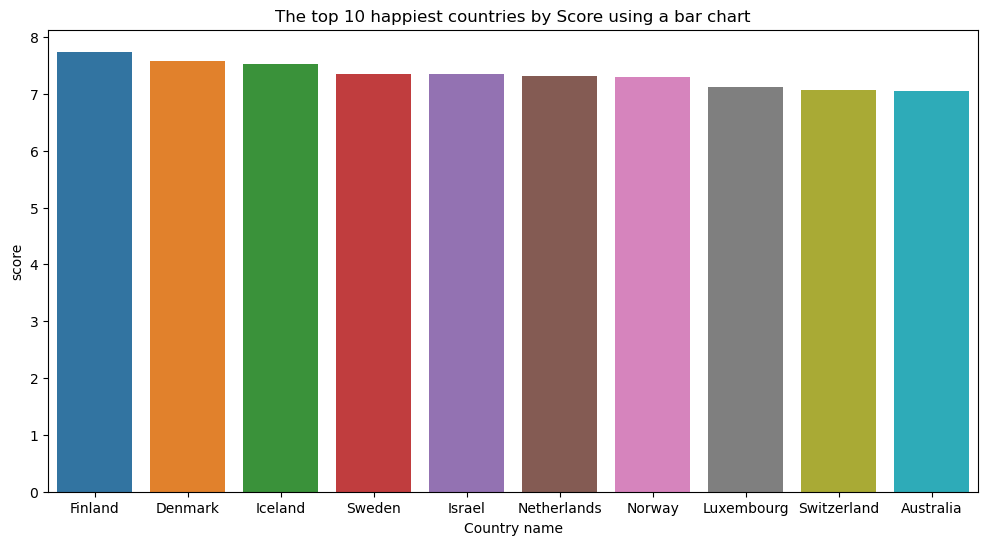

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=grped_c_happy, x='Country name', y='score')
plt.title('The top 10 happiest countries by Score using a bar chart')

In [28]:
grped_c_sad = (df.groupby('Country name')['score'].mean().reset_index()).sort_values(by='score',ascending=True).head(10)

grped_c_sad

,Country name,score
0,Afghanistan,1.721
71,Lebanon,2.707
72,Lesotho,3.186
112,Sierra Leone,3.245
26,Congo (Kinshasa),3.295
139,Zimbabwe,3.341
13,Botswana,3.383
78,Malawi,3.421
138,Zambia,3.502
37,Eswatini,3.502


Text(0.5, 1.0, 'The top 10 saddest countries by Score using a bar chart')

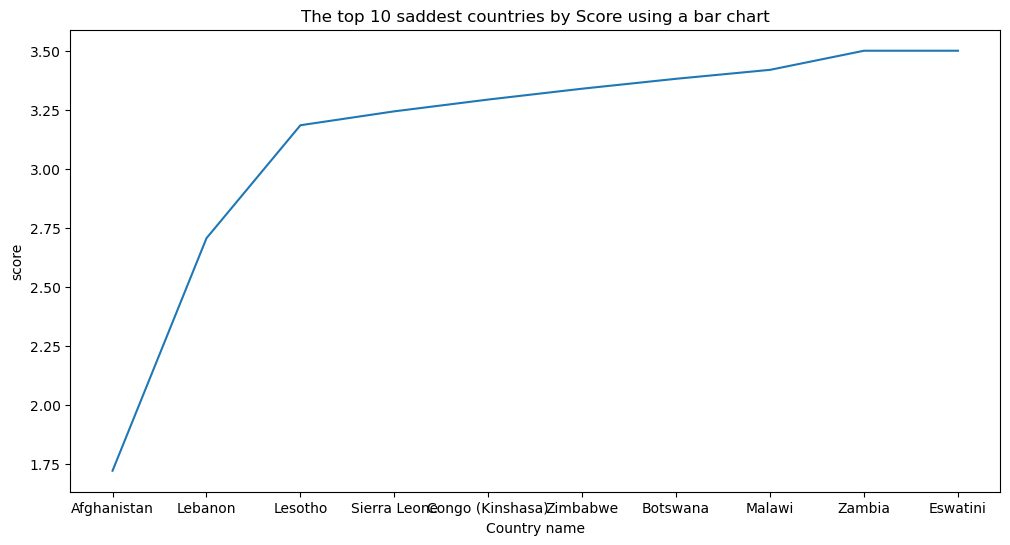

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=grped_c_sad, x='Country name', y='score')
plt.title('The top 10 saddest countries by Score using a bar chart')

<Axes: xlabel='score', ylabel='Count'>

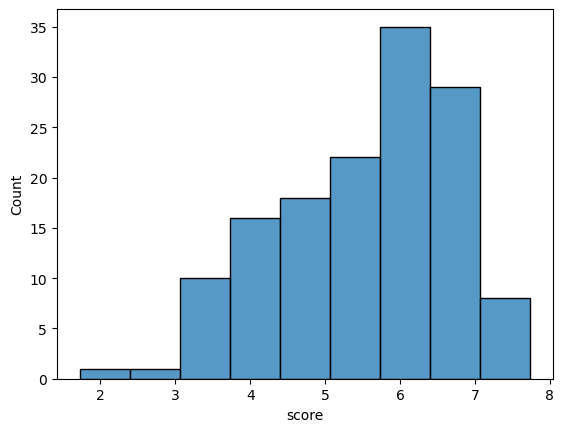

In [30]:
sns.histplot(data=df,x='score')

<Axes: xlabel='Log GDP per capita', ylabel='score'>

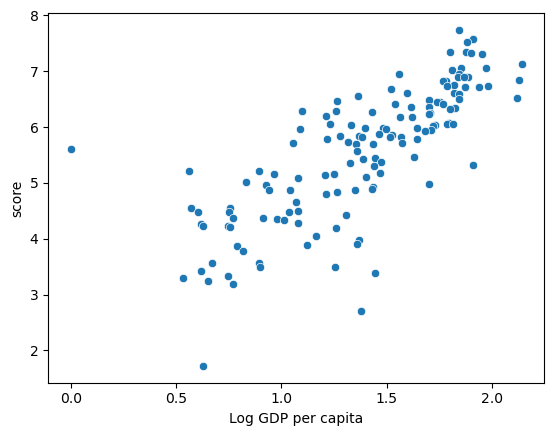

In [31]:
sns.scatterplot(data=df,x='Log GDP per capita',y='score')

<h1>Problem 2</h1>

<h3>Task 1</h3>

In [34]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

def filter_country(lists):
    new_df = pd.DataFrame()
    for i in lists:
        if i in df['Country name'].values: 
            new_df = pd.concat([new_df, df[df['Country name'] == i]]) 

    return new_df

filtered_df = filter_country(south_asian_countries)

In [35]:
filtered_df.to_csv('South_asian_countries.csv', index=False)

<h3>Task 2</h3>

In [37]:
south_asian = pd.read_csv('South_asian_countries.csv')

In [38]:
south_asian

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category
0,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low
1,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
4,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
5,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low


In [39]:
south_asian['Composite_Score'] = 0.40 * south_asian['Log GDP per capita'] + 0.30 * south_asian['Social support'] + 0.30 * south_asian['Healthy life expectancy']

In [40]:
south_asian.sort_values(by='Composite_Score',ascending=False)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category,Composite_Score
5,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
3,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
4,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
1,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
0,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


<BarContainer object of 6 artists>

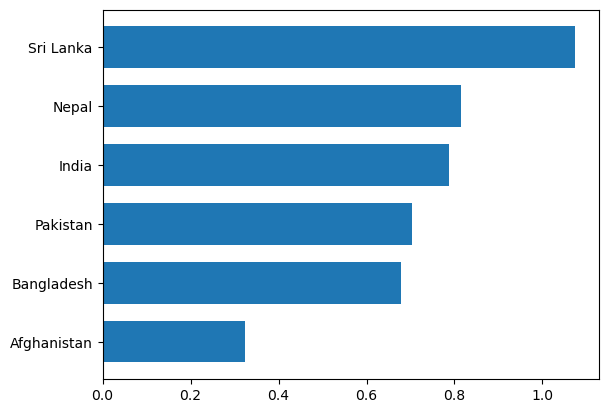

In [41]:
comp_sc = (south_asian.groupby('Country name')['Composite_Score'].mean().reset_index()).sort_values(by='Composite_Score',ascending=True)
plt.barh(comp_sc['Country name'],comp_sc['Composite_Score'] ,height=0.7)

<Axes: xlabel='Country name', ylabel='score'>

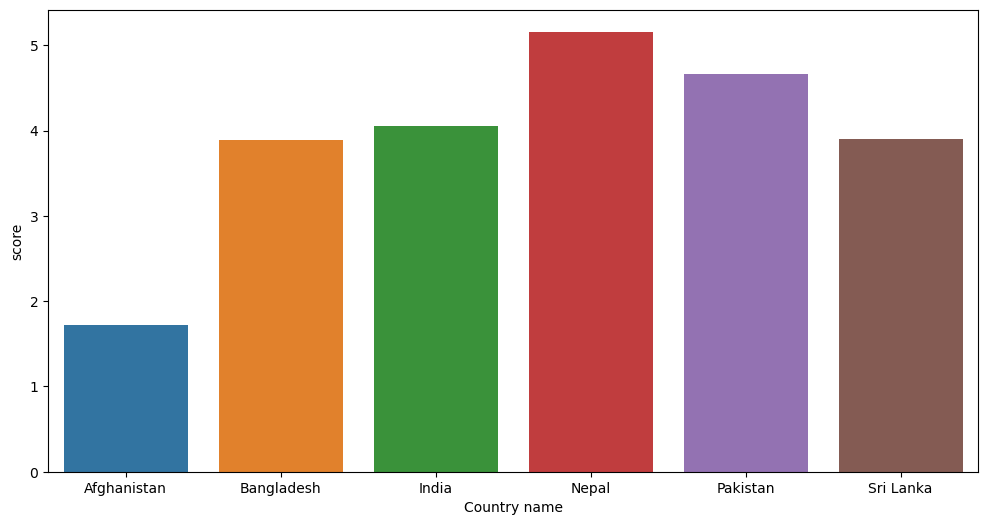

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=south_asian,x='Country name',y='score')

<h3>Task 3</h3>

<Axes: xlabel='Log GDP per capita', ylabel='score'>

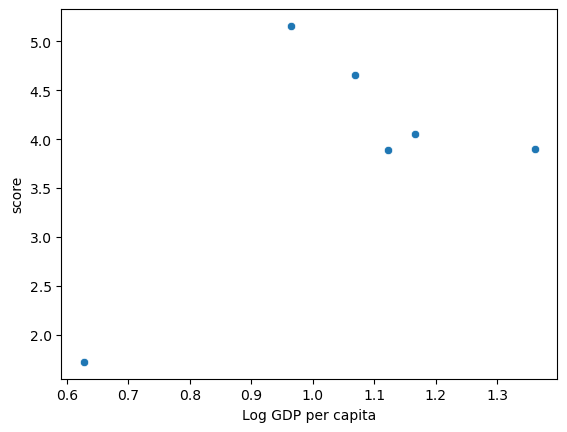

In [44]:
sns.scatterplot(data=south_asian , x='Log GDP per capita',y='score')

In [45]:
south_asian.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite_Score
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.895667,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500,0.730383
std,1.177069,0.245361,0.441024,0.125082,0.287022,0.039267,0.046427,0.718496,0.243880
min,1.721000,0.628000,0.000000,0.242000,0.000000,0.091000,0.031000,0.014000,0.323800
25%,3.889000,0.991000,0.336750,0.345000,0.552250,0.141000,0.077500,0.693000,0.684025
50%,3.976000,1.095500,0.626500,0.430000,0.618000,0.144000,0.101500,0.837500,0.745650
75%,4.506250,1.155000,0.905750,0.495500,0.738500,0.166500,0.120250,1.567000,0.808775
max,5.158000,1.361000,1.179000,0.586000,0.775000,0.209000,0.167000,1.907000,1.073900


In [46]:
outlier_score =1.5 * ( 4.657000 - 3.889000)	
outlier_capita = 1.5 * (1.155000 - 0.991000)

In [47]:
outlier_score

1.1520000000000004

In [48]:
outlier_capita

0.24600000000000005

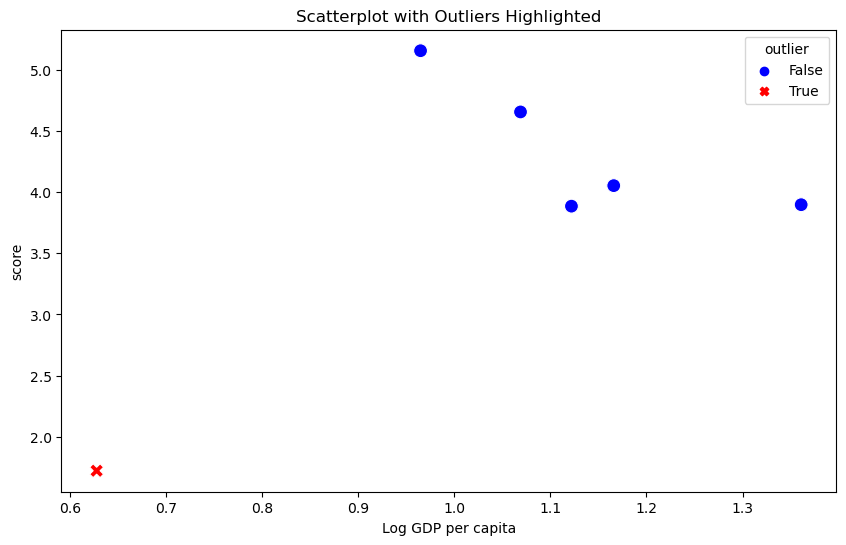

In [49]:
score_lower, score_upper = 2.737, 5.809
capita_lower, capita_upper = 0.745, 1.401

south_asian['outlier'] = (
    (south_asian['score'] < score_lower) | (south_asian['score'] > score_upper) |
    (south_asian['Log GDP per capita'] < capita_lower) | (south_asian['Log GDP per capita'] > capita_upper)
)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asian,
    x='Log GDP per capita',
    y='score',
    hue='outlier',  # Color points based on outlier status
    palette={False: 'blue', True: 'red'},
    style='outlier',  # Optionally, add different markers for outliers
    markers={False: 'o', True: 'X'},
    s=100  # Adjust marker size
)
plt.title('Scatterplot with Outliers Highlighted')
plt.show()

In [50]:
outliers = (south_asian[south_asian['outlier'] == True])
outliers['Country name']

0    Afghanistan
Name: Country name, dtype: object

<h3>Task 4</h3>

In [52]:
for_cor = south_asian[['Freedom to make life choices','Generosity']]
for_sc = south_asian['score']

In [53]:
correlations = for_cor.apply(lambda col: col.corr(for_sc))

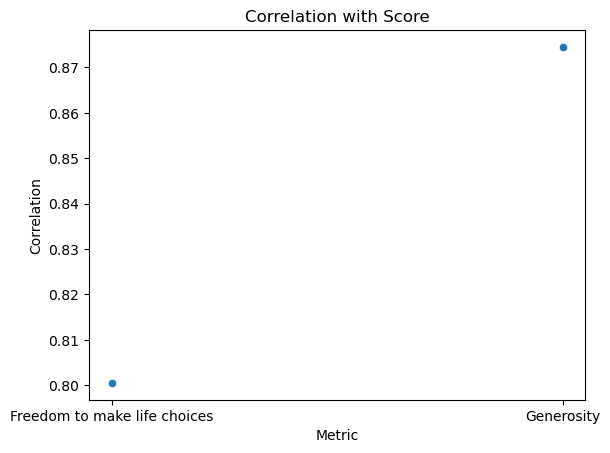

In [54]:
cor_df = correlations.reset_index()
cor_df.columns = ['Metric', 'Correlation']


sns.scatterplot(data=cor_df, x='Metric', y='Correlation')
plt.title('Correlation with Score')
plt.xlabel('Metric')
plt.ylabel('Correlation') 
plt.show()

<h3>Task 5</h3>

In [56]:
south_asian['GDP-Score Gap'] = south_asian['score'] - south_asian['Log GDP per capita']

In [57]:
south_asian

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category,Composite_Score,outlier,GDP-Score Gap
0,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,True,1.093
1,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,False,2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,False,2.888
3,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,False,4.193
4,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,False,3.588
5,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,False,2.537


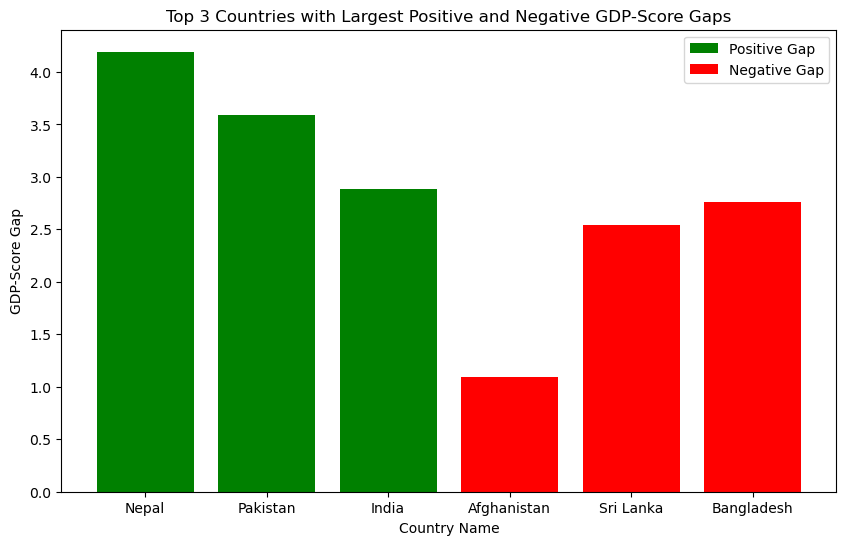

In [58]:
df_sorted_positive = south_asian.nlargest(3, "GDP-Score Gap")
df_sorted_negative = south_asian.nsmallest(3, "GDP-Score Gap")

plt.figure(figsize=(10, 6))
plt.bar(df_sorted_positive["Country name"], df_sorted_positive["GDP-Score Gap"], color='green', label='Positive Gap')
plt.bar(df_sorted_negative["Country name"], df_sorted_negative["GDP-Score Gap"], color='red', label='Negative Gap')

plt.title("Top 3 Countries with Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("Country Name")
plt.ylabel("GDP-Score Gap")
plt.legend()
plt.show()

<h1>Problem 3</h1>

In [60]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
                         "United Arab Emirates", "Yemen"]

middle = filter_country(middle_east_countries)

In [61]:
middle.to_csv('Middle.csv',index=False)

In [62]:
df2 = pd.read_csv('Middle.csv')

<h2>Descriptive Statistics</h2>

In [64]:
df2['score'].mean()

5.351333333333333

In [65]:
south_asian['score'].mean()

3.895666666666667

In [66]:
df2['score'].std()

1.648656346847335

In [67]:
south_asian['score'].std()

1.1770690152521501

<h2>Top and Bottom Performers</h2>

In [69]:
bottom = df2.sort_values(by='score',ascending=False)
top = south_asian.sort_values(by='score',ascending=False)

In [70]:
top

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category,Composite_Score,outlier,GDP-Score Gap
3,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,False,4.193
4,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,False,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,False,2.888
5,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,False,2.537
1,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,False,2.764
0,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,True,1.093


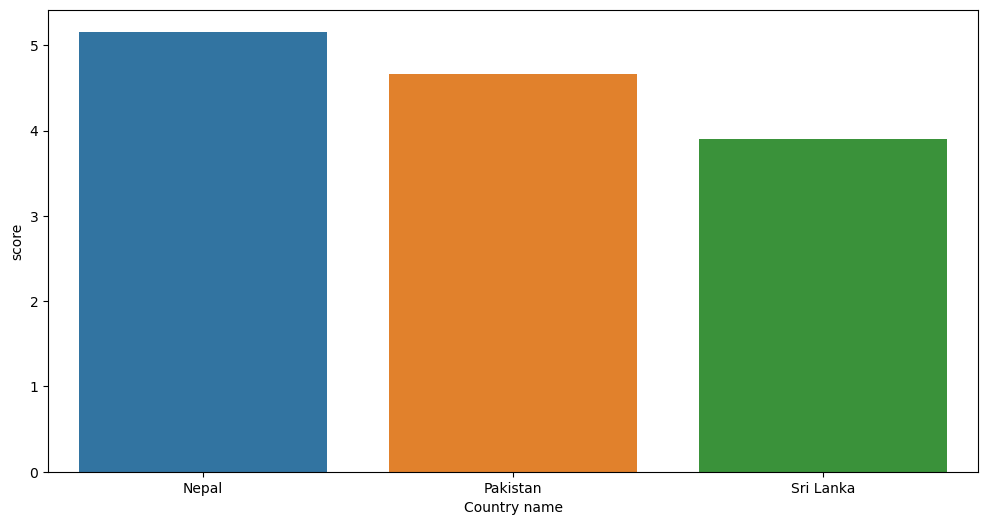

In [71]:
east_bottom = (bottom.groupby('Country name')['score'].mean().reset_index()).head(3)
east_top = (bottom.groupby('Country name')['score'].mean().reset_index()).tail(3)

asian_top = (top.groupby('Country name')['score'].mean().reset_index()).head(3)
asian_bottom = (top.groupby('Country name')['score'].mean().reset_index()).tail(3)



plt.figure(figsize=(12,6))
sns.barplot(data=asian_bottom,x='Country name',y='score')
plt.show()

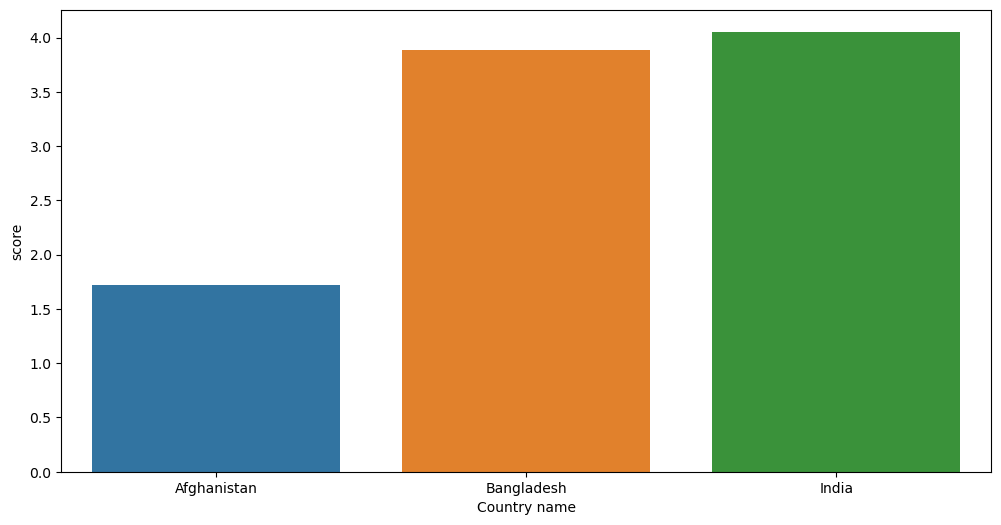

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(data=asian_top,x='Country name',y='score')
plt.show()

In [197]:
bottom

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category
2,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
4,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
7,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
6,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
1,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
0,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
3,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
8,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
5,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


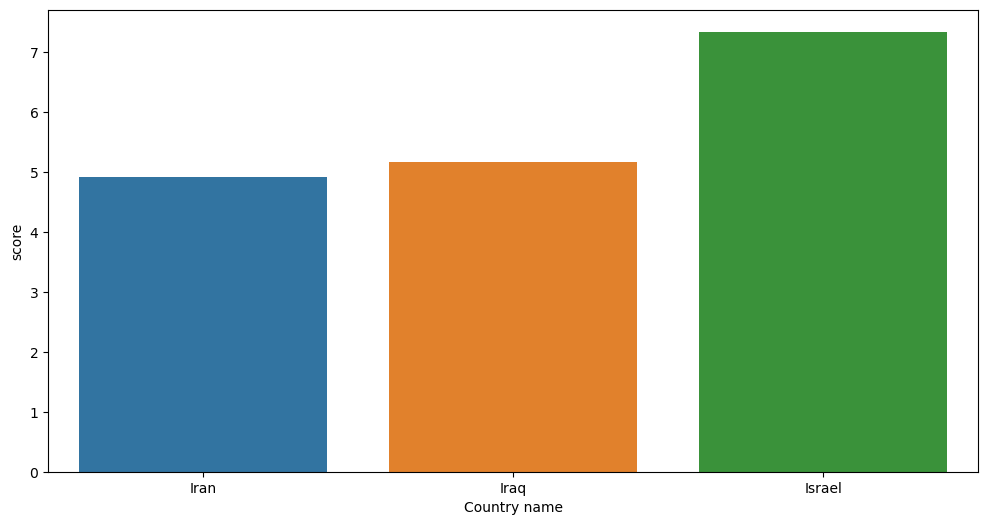

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=east_bottom,x='Country name',y='score')
plt.show()

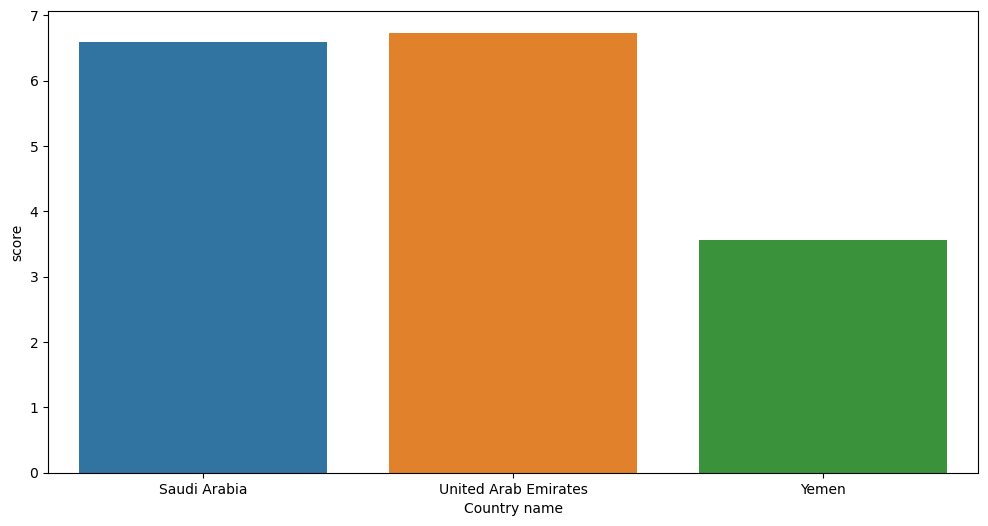

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(data=east_top,x='Country name',y='score')
plt.show()

<h1>Metric Comparisons</h1>

In [76]:
df2

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_category
0,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
1,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
2,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
3,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
4,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
5,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
6,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
7,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
8,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low


Text(0.5, 29.00000000000003, 'Metric')

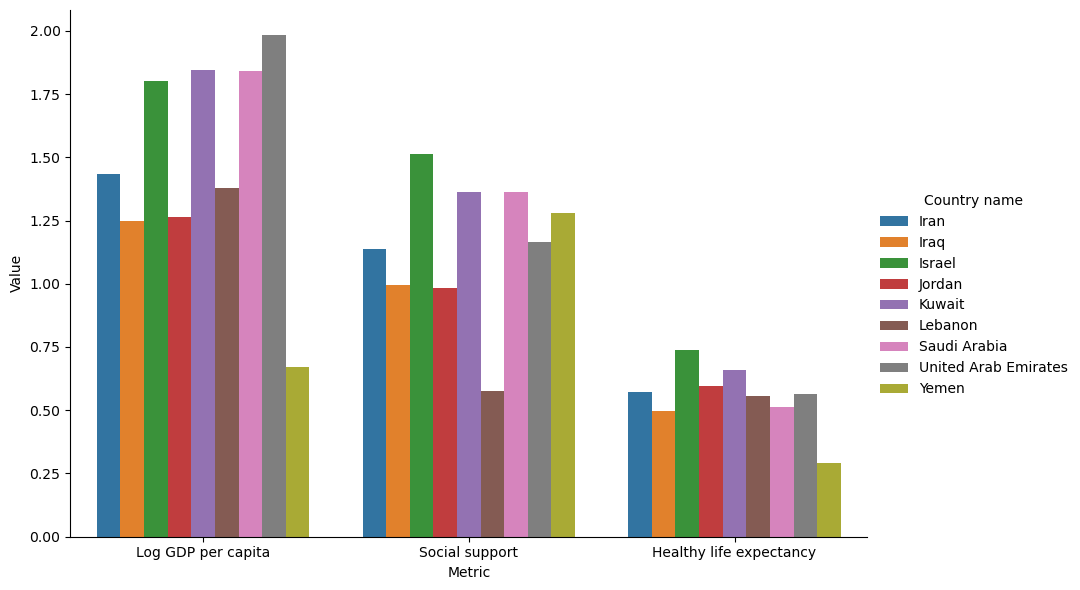

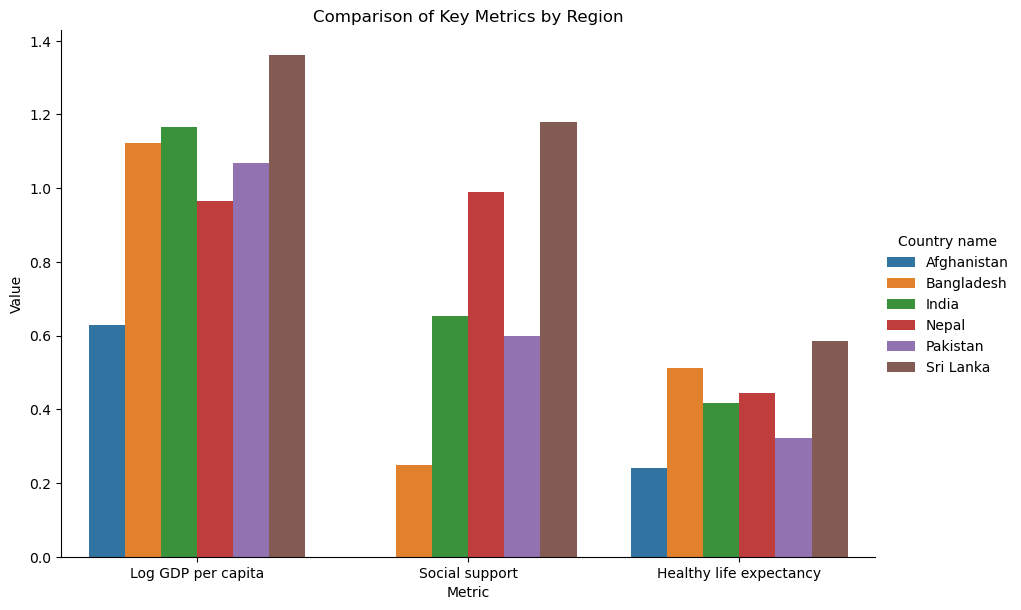

In [77]:
melted_df = df2.melt(id_vars=['Country name'], 
                     value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'], 
                     var_name='Metric', 
                     value_name='Value')

melted_df2 = south_asian.melt(
    id_vars=['Country name'], 
    value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'], 
    var_name='Metric', 
    value_name='Value'
) 

sns.catplot(
    data=melted_df, 
    x='Metric', 
    y='Value', 
    hue='Country name', 
    kind='bar', 
    height=6, 
    aspect=1.5
)


sns.catplot(
    data=melted_df2, 
    x='Metric', 
    y='Value', 
    hue='Country name', 
    kind='bar', 
    height=6, 
    aspect=1.5
)



plt.title("Comparison of Key Metrics by Region")
plt.ylabel("Value")
plt.xlabel("Metric")

<h1>Happiness Disparity</h1>

In [79]:
middle_min = df2['score'].min()

In [80]:
middle_max = df2['score'].max()

In [81]:
south_asia_min = south_asian['score'].min()

In [82]:
south_asian_max = south_asian['score'].max()

In [83]:
range_for_middle = middle_max - middle_min

In [84]:
range_for_asia = south_asian_max - south_asia_min

In [85]:
range_for_asia

3.4370000000000003

In [86]:
range_for_middle

4.634

In [87]:
cv_south_asians = (south_asian['score'].std() / south_asian['score'].mean()) * 100
cv_middle_east = (df2['score'].std() / df2['score'].mean()) * 100

In [88]:
cv_middle_east

30.808328395054225

In [89]:
cv_south_asians

30.214828833374263

<h1>Correlation Analysis</h1>

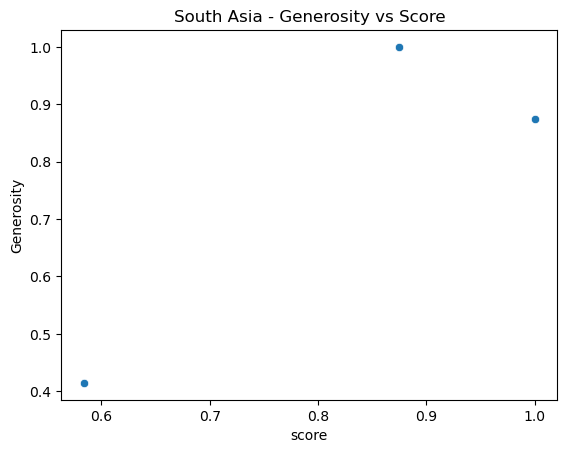

In [91]:
cor_south_asian = south_asian[['score', 'Generosity', 'Log GDP per capita']].corr()

sns.scatterplot(data=cor_south_asian, x='score', y='Generosity')
plt.title('South Asia - Generosity vs Score')
plt.show()

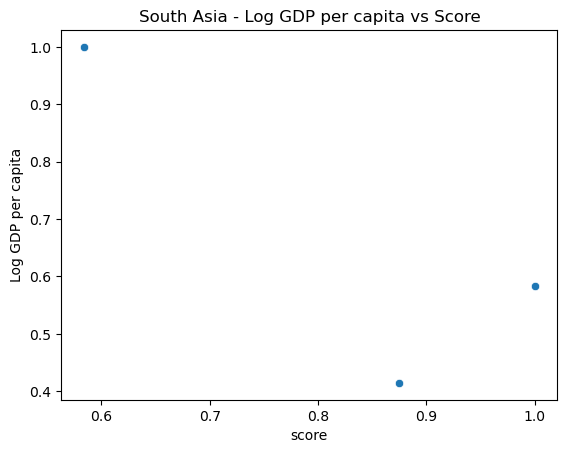

In [92]:
sns.scatterplot(data=cor_south_asian, x='score', y='Log GDP per capita')
plt.title('South Asia - Log GDP per capita vs Score')
plt.show()

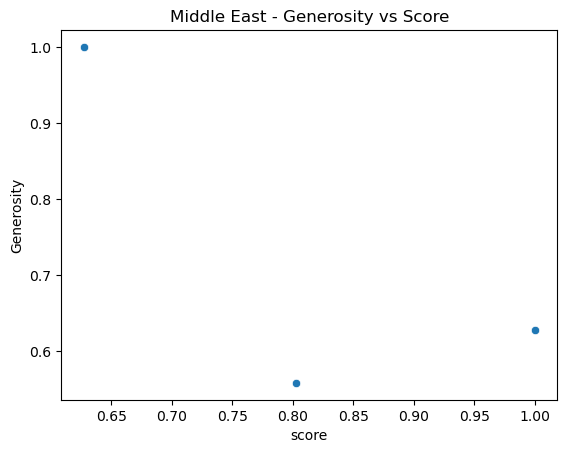

In [93]:
cor_middle_east = df2[['score', 'Generosity', 'Log GDP per capita']].corr()

sns.scatterplot(data=cor_middle_east, x='score', y='Generosity')
plt.title('Middle East - Generosity vs Score')
plt.show()

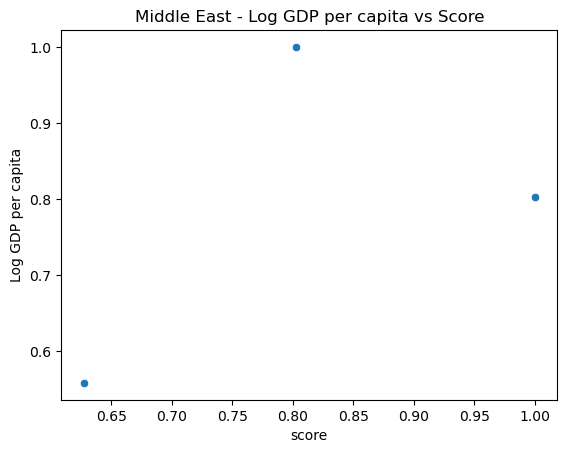

In [94]:
sns.scatterplot(data=cor_middle_east, x='score', y='Log GDP per capita')
plt.title('Middle East - Log GDP per capita vs Score')
plt.show()

<h1>Outlier Detection</h1>

<Axes: xlabel='Log GDP per capita', ylabel='score'>

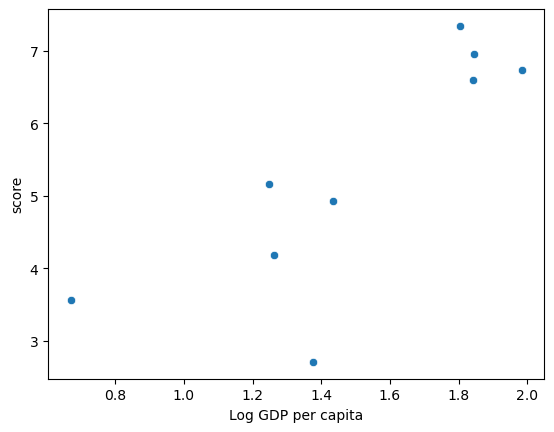

In [96]:
sns.scatterplot(data=df2,x='Log GDP per capita',y='score')

<Axes: xlabel='Log GDP per capita', ylabel='score'>

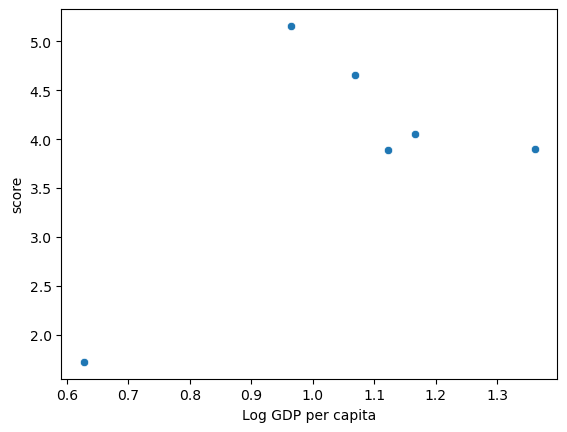

In [97]:
sns.scatterplot(data=south_asian,x='Log GDP per capita',y='score')

<h1>Visualization</h1>

In [99]:
df_combined = pd.concat([df2['score'], south_asian['score']], axis=1)
df_combined.columns = ['Middle_east_Scores', 'South_Asian_Scores']

In [100]:
df_combined.isnull().sum()

Middle_east_Scores    0
South_Asian_Scores    3
dtype: int64

In [101]:
df_combined = df_combined.dropna()

In [102]:
df_combined

,Middle_east_Scores,South_Asian_Scores
0,4.923,1.721
1,5.166,3.886
2,7.341,4.054
3,4.186,5.158
4,6.951,4.657
5,2.707,3.898


<Axes: xlabel='Middle_east_Scores'>

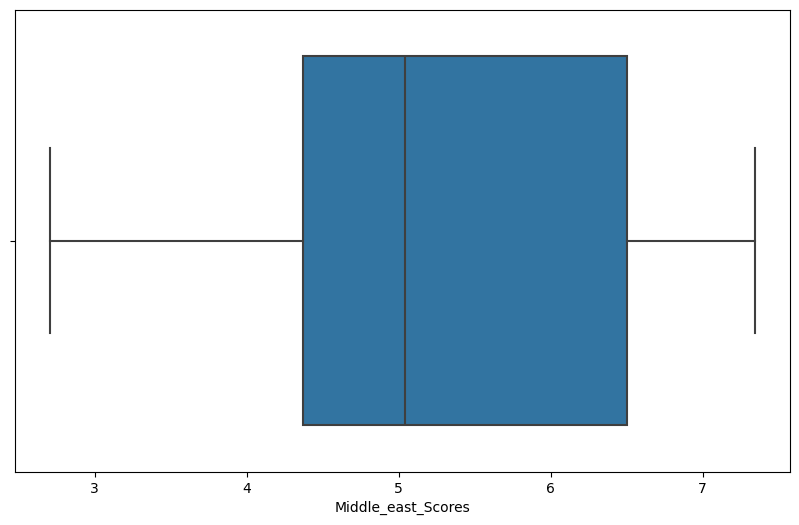

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined,x='Middle_east_Scores')

<Axes: xlabel='South_Asian_Scores'>

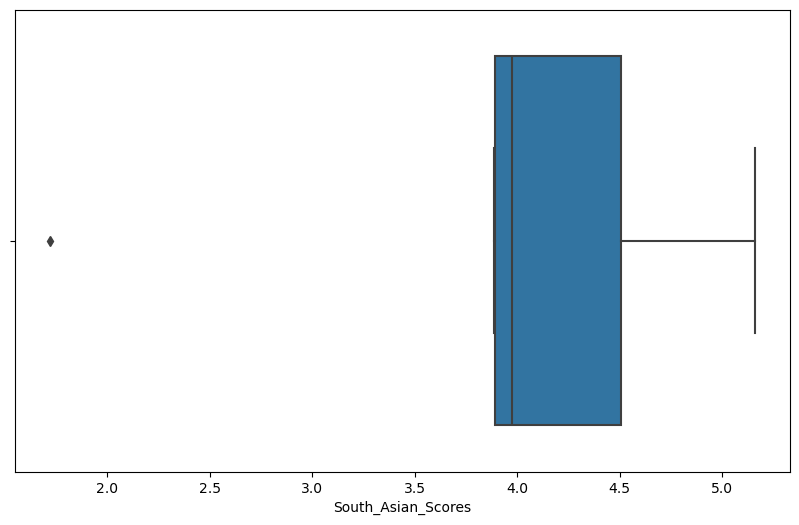

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined,x='South_Asian_Scores')